In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
import numpy as np

/usr/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
mol1 = Chem.MolFromSmiles('COc1cc2c(cc1OCCCN3CCOCC3)c(ncn2)Nc4ccc(c(c4)Cl)F')

In [3]:
mol2 = Chem.MolFromSmiles('COCCOc1cc2c(cc1OCCOC)ncnc2Nc3cccc(c3)C#C')

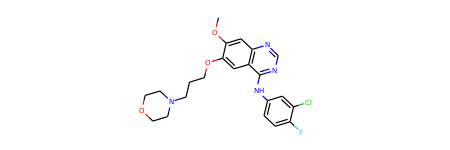

In [4]:
mol1

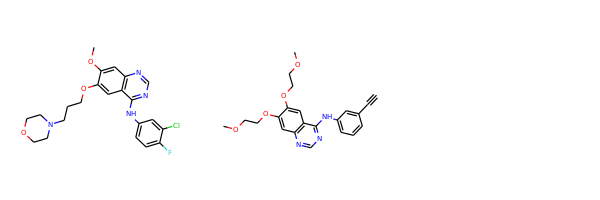

In [5]:
Draw.MolsToGridImage([mol1,mol2])

In [6]:
fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

In [7]:
fp1.ToBitString()

'00000000000000000000000000000000000000100010000000000000010000000100000010010100100001110000010101101101010101010100001011100111110011110110001111111011110111111111110'

In [8]:
fp2.ToBitString()

'00000000000000000100000000000000000000100000000000000000000000000100000010000100100000100000010001100100010001000101101011000111000011010110101111110111110111111111110'

In [9]:
fp_a1 = np.array(map(int, fp1.ToBitString()))
fp_a2 = np.array(map(int, fp2.ToBitString()))

In [10]:
from scipy.spatial.distance import dice

Distance

In [11]:
dice(fp_a1, fp_a2)

0.18181818181818182

Similarity

In [12]:
1 - dice(fp_a1, fp_a2)

0.8181818181818181

In [13]:
from rdkit.Chem.Draw import SimilarityMaps

In [14]:
%matplotlib inline

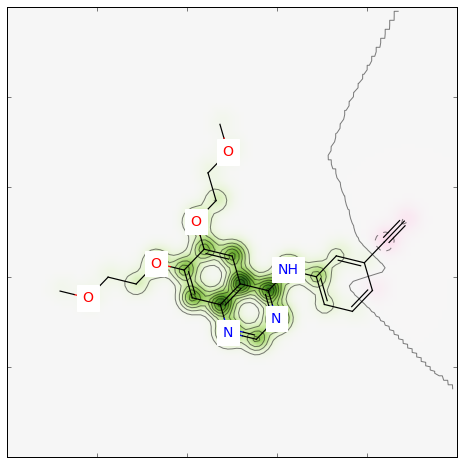

In [15]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mol1, mol2, SimilarityMaps.GetMorganFingerprint)

## Working with many molecules

In [16]:
from rdkit.Chem import PandasTools

In [17]:
import pandas as pd

In [18]:
df = PandasTools.LoadSDF('../data/test.sdf')

,ID,ROMol,logp,mw
0,DB01322,,2.6648,232.278994301

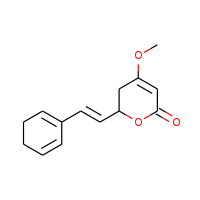

In [19]:
df.head(1)

In [20]:
from rdkit.Chem import Descriptors

In [21]:
df['HAC'] = df['ROMol'].map(Descriptors.HeavyAtomCount)
df['HBD'] = df['ROMol'].map(Descriptors.NumHDonors)

,ID,ROMol,logp,mw,HAC,HBD
0,DB01322,,2.6648,232.278994301,17,0

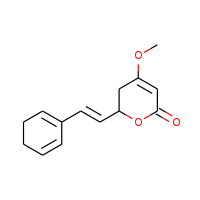

In [22]:
df.head(1)

In [23]:
df['HAC'].head(5) > 15

0     True
1     True
2    False
3     True
4    False
Name: HAC, dtype: bool

,ID,ROMol,logp,mw,HAC,HBD
11,DB01466,,1.8912,313.396992668,23,1
23,DB01505,,1.5922,321.416992584,23,1
48,DB01568,,1.5137,315.368992584,23,1
53,DB04829,,2.906,323.439993095,24,1
72,DB01333,,0.3486,349.411994507,24,3

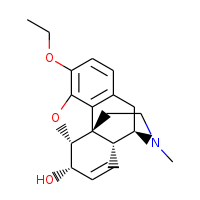
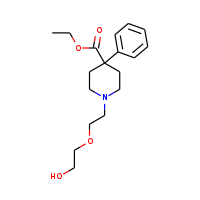
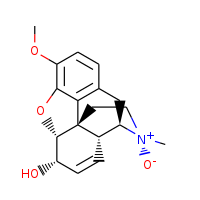
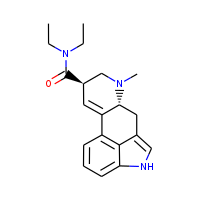
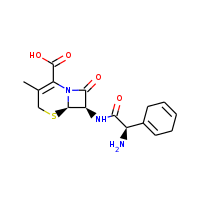

In [24]:
df[(df['HAC'] > 22) & df['HBD'] == 1]

## Interactivity

In [25]:
from ipywidgets import interact, fixed
from IPython.display import display

Helper function that displays something

In [26]:
def show_frame(df, sort_by, ascending=True, num=2):
    display(df.sort_values(sort_by, ascending=ascending).head(num))

,ID,ROMol,logp,mw,HAC,HBD
29,DB01525,,-0.0854,185.222995872,13,2
56,DB00529,,-0.1579,126.003998589,7,3

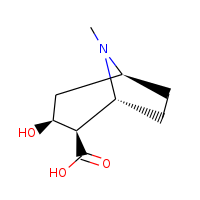
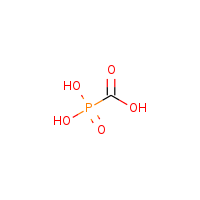

In [27]:
show_frame(df, 'logp')

,ID,ROMol,logp,mw,HAC,HBD
0,DB01322,,2.6648,232.278994301,17,0
52,DB01579,,2.0782,191.27399572,14,0

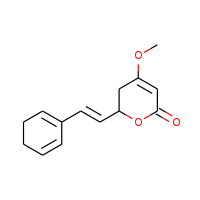
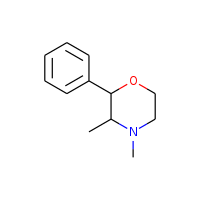

<function __main__.show_frame>

In [28]:
interact(show_frame, df=fixed(df), sort_by={'HAC':'HAC', 'HBD':'HBD'}, num=[1,3])